In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# dataviz
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 1. Data Loading

In [3]:
train = pd.read_csv('../data/diamonds_train.csv')
train_clean = pd.read_csv('../data/new_data_clean.csv')
test = pd.read_csv('../data/diamonds_predict.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')
data_raw = pd.read_csv('../data/data_clean.csv')

### 2. Exploratory data analysis

In [4]:
train.shape

(40455, 10)

In [5]:
train_clean.shape

(40438, 11)

In [6]:
test.shape

(13485, 10)

In [7]:
data_raw.shape

(40433, 18)

In [8]:
%config InlineBackend.figure_format = 'jpg'

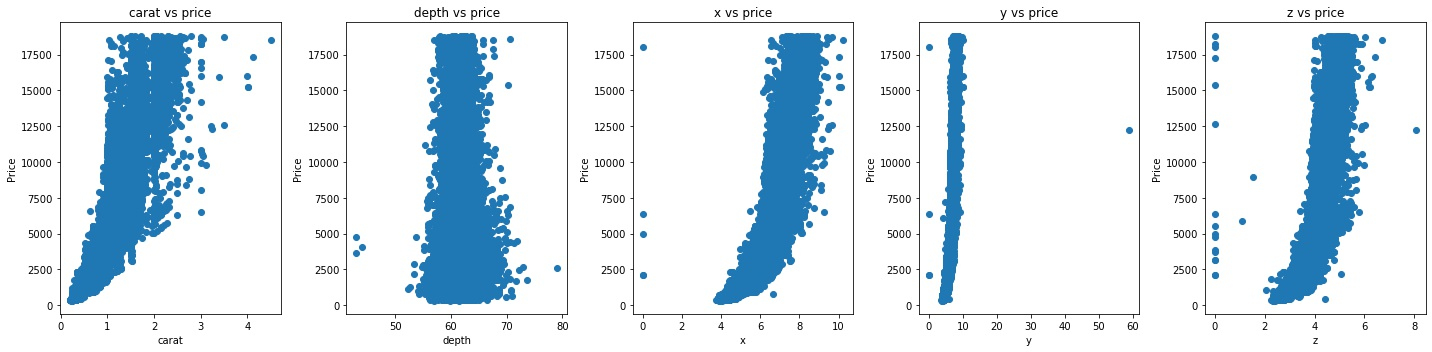

In [9]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

for ax, column in [[ax1, 'carat'], [ax2, 'depth'], [ax3, 'x'], [ax4, 'y'], [ax5, 'z']]:
    ax.scatter(train[column], train['price'])
    ax.set_title(f'{column} vs price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    plt.tight_layout()

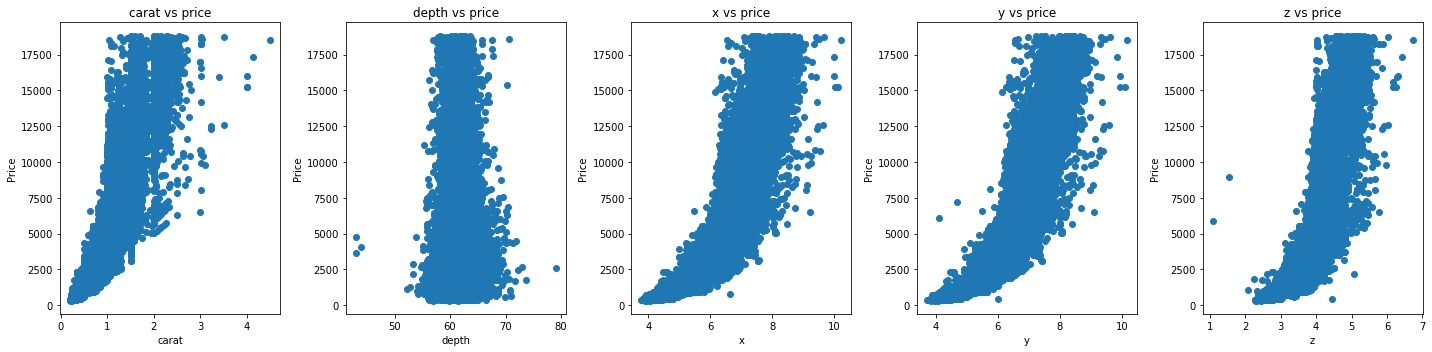

In [10]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

for ax, column in [[ax1, 'carat'], [ax2, 'depth'], [ax3, 'x'], [ax4, 'y'], [ax5, 'z']]:
    ax.scatter(train_clean[column], train_clean['price'])
    ax.set_title(f'{column} vs price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    plt.tight_layout()

In [11]:
%config InlineBackend.figure_format = 'svg'

### 3. Modeling

#### Preprocessing

In [12]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

for cat_feat in cat_features:
    train[cat_feat] = train[cat_feat].astype('category')
    train_clean[cat_feat] = train_clean[cat_feat].astype('category')
    test[cat_feat] = test[cat_feat].astype('category')

cat_df = pd.get_dummies(train[cat_features])
num_df = train.loc[:,num_features]
train_df = pd.concat([cat_df, num_df], axis=1)

cat_clean_df = pd.get_dummies(train_clean[cat_features])
num_clean_df = train_clean.loc[:,num_features]
train_clean_df = pd.concat([cat_clean_df, num_clean_df], axis=1)

cat_df = pd.get_dummies(test[cat_features])
num_df = test.loc[:,num_features]
test_df = pd.concat([cat_df, num_df], axis=1)

features = list(cat_df.columns) + list(num_df.columns)

In [21]:
test.head()
# train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(train_df.loc[:,features].values)
y = train[target]

X_clean = scaler.fit_transform(train_clean_df.loc[:,features].values)
y_clean = train_clean[target]

# X_test = scaler.fit_transform(test_df.loc[:,features].values)
# y_test = test[target]

<font color='red'>Hay que cambiar los datos de entrada y hacer el train_test_split con train y train_clean

<font color='red'>Continuamos en otro Notebook con la base del guided_lesson y probando desde el principio (LinearRegression) con los dos datos, train y train_clean</font>

#### 1 - Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
base_model = model.fit(X=X, y=y)
clean_model = model.fit(X=X_clean, y=y_clean)

--------- Check model performance ---------

In [16]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_test = model.predict(X)
y_train = model.predict(X)